# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
vaccrate = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  index = col_double(),
  state = col_character(),
  year = col_character(),
  name = col_character(),
  type = col_character(),
  city = col_character(),
  county = col_character(),
  district = col_logical(),
  enroll = col_double(),
  mmr = col_double(),
  overall = col_double(),
  xrel = col_logical(),
  xmed = col_double(),
  xper = col_double(),
  lat = col_double(),
  lng = col_double()
)




In [3]:
vaccrate %>% head

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
#create the df_vacc_rates here

df_vacc_rates = vaccrate %>%
    group_by(state) %>%
    filter(mmr >= 0) %>%
    summarize(fraction_above_95= sum(mmr >= 95, na.rm=TRUE)/n())

df_vacc_rates

state,fraction_above_95
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397
Maine,0.473389356
Massachusetts,0.865828092
Minnesota,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [4]:
vaccrate %>%
    group_by(state) %>%
    filter(mmr >= 0) %>%
    summarize(fraction_above_95= sum(mmr >= 95, na.rm=TRUE)/n()) %>%
    arrange(fraction_above_95)

state,fraction_above_95
<chr>,<dbl>
Arkansas,0.003527337
Washington,0.326592518
North Dakota,0.455555556
Maine,0.473389356
Minnesota,0.473948525
Ohio,0.491606715
Arizona,0.506404782
Oregon,0.593052109
Colorado,0.623092236


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [3]:
ecdf = vaccrate %>%
    arrange(overall) %>%
    filter(state == "North Carolina") %>%
    mutate(rn = row_number(), fraction_of_schools = rn / max(rn))

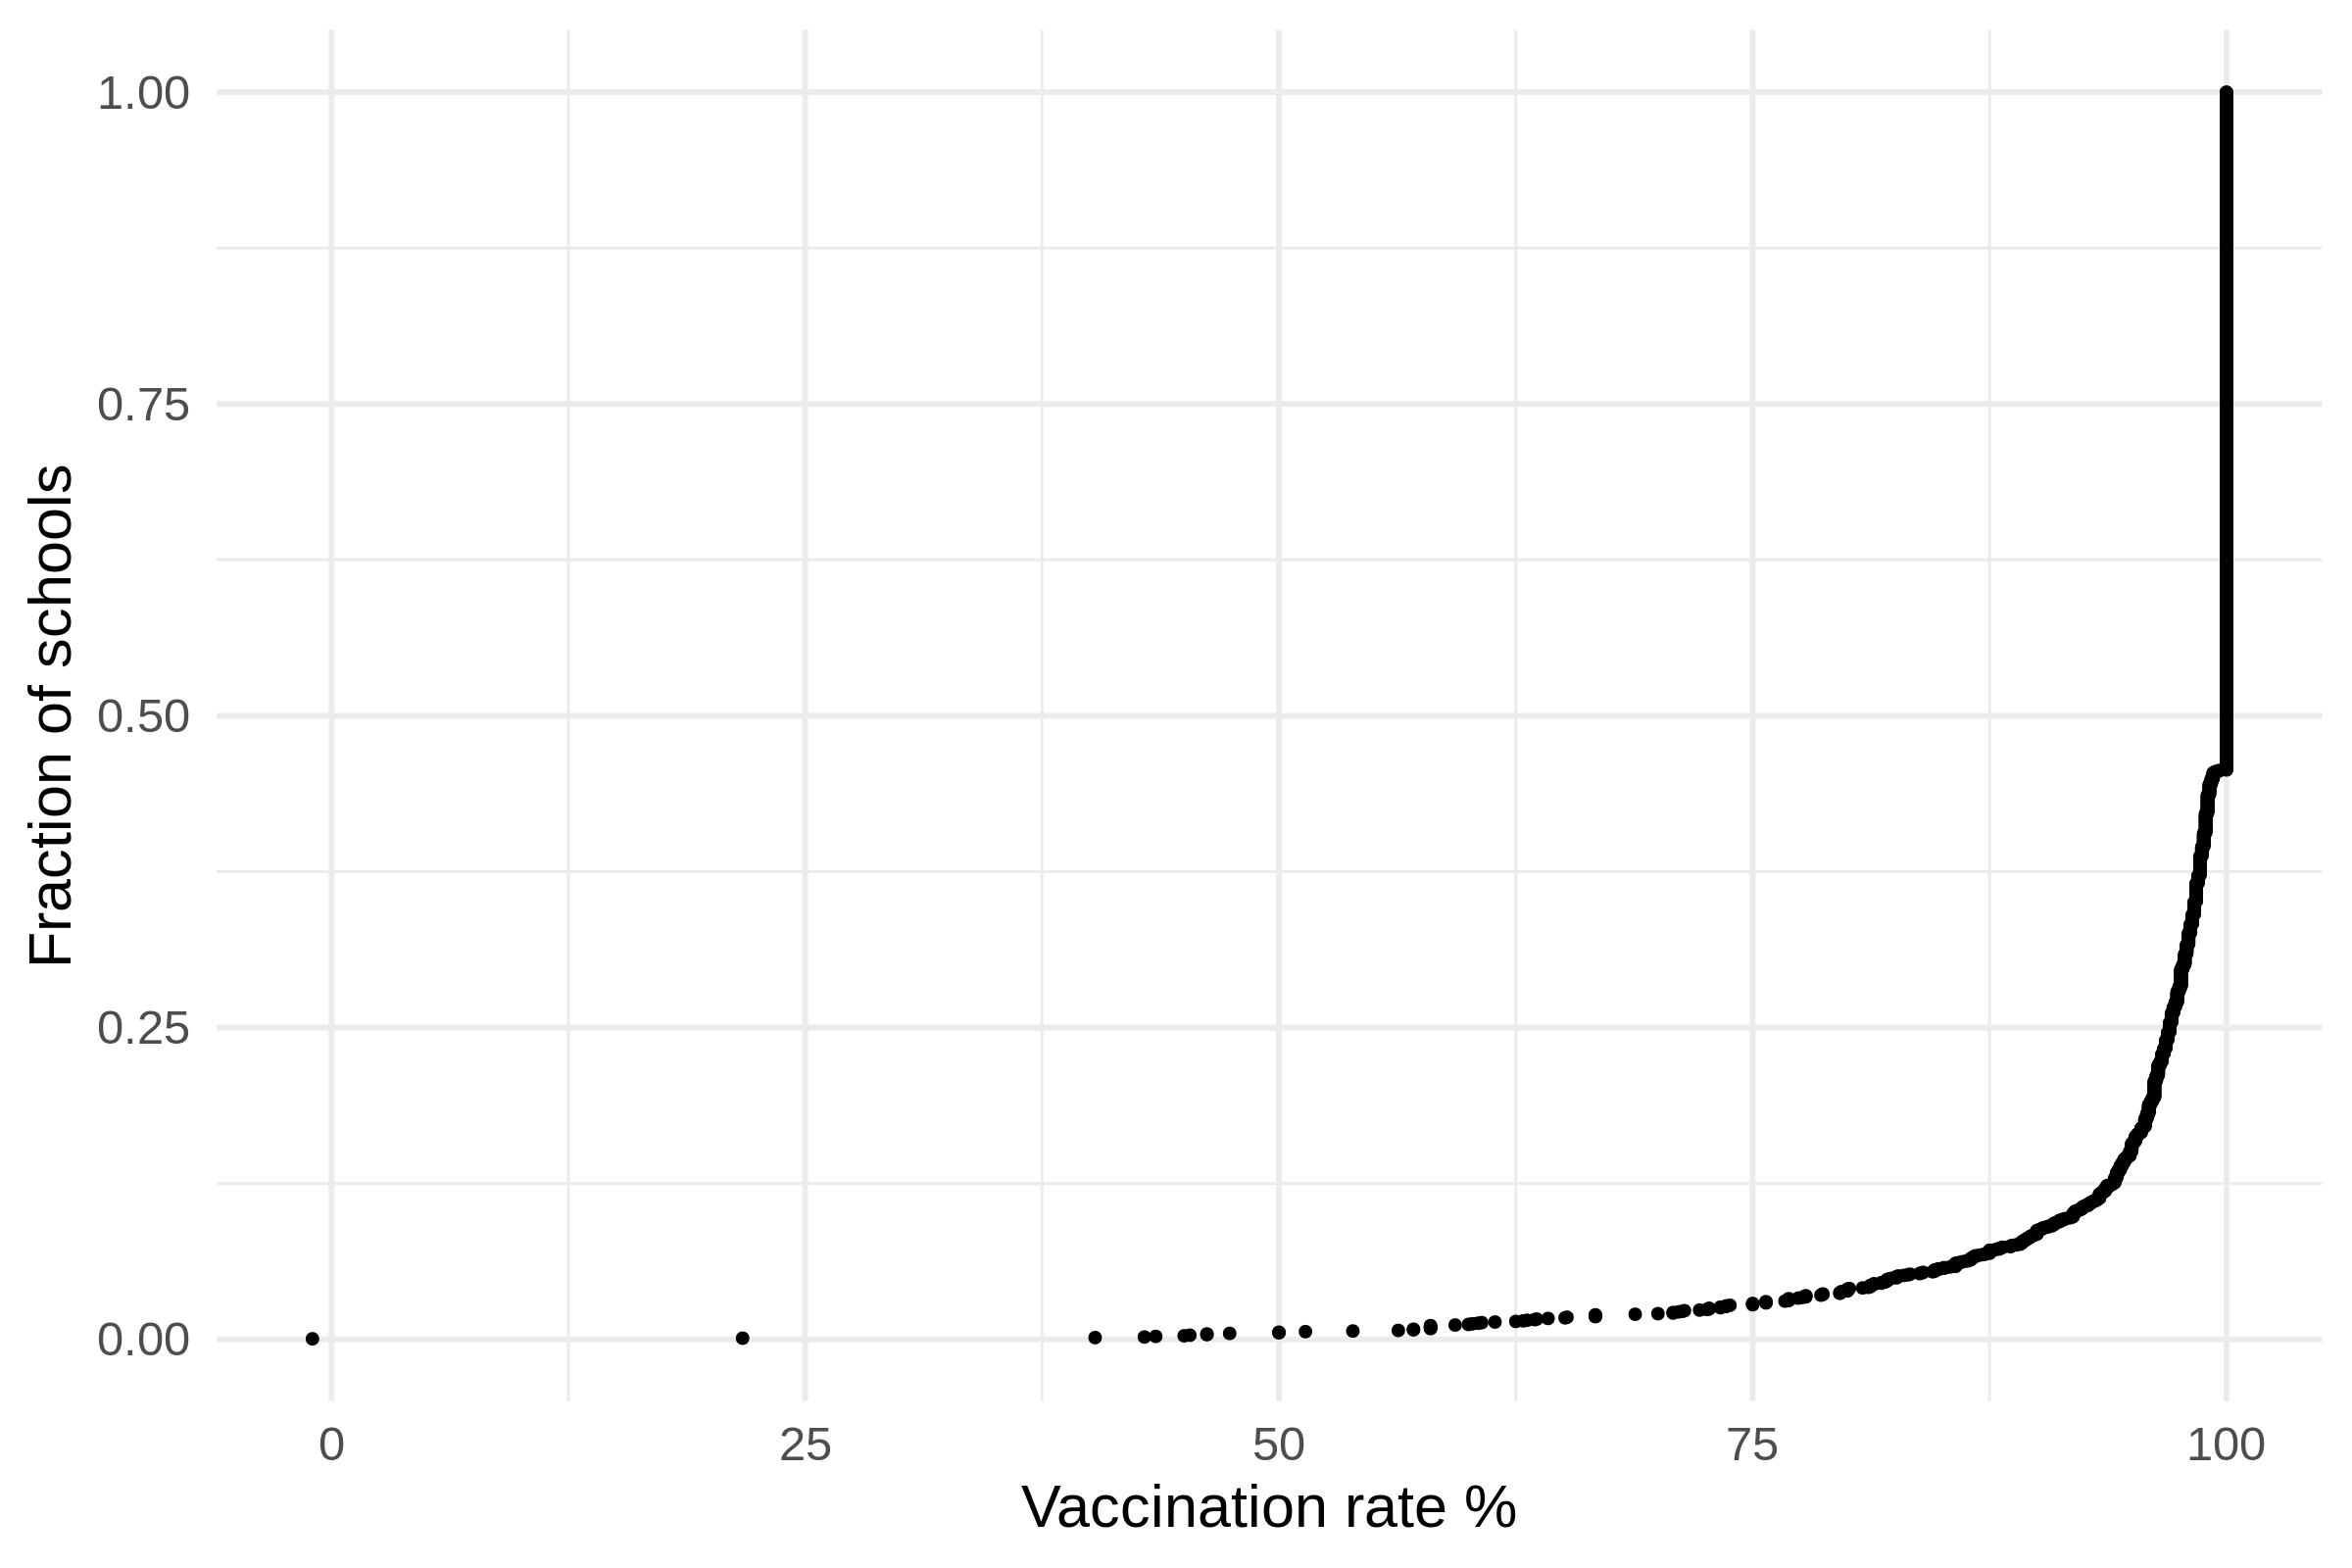

In [4]:
options(repr.plot.height = 4, repr.plot.width = 6, repr.plot.res = 400)

p = ggplot(ecdf, aes(x = overall, y = fraction_of_schools,
                         ))

p = p + geom_point(size = 0.5)
        
p = p + scale_color_brewer(palette = "Set2")

p = p + theme_minimal()

p = p + labs(x = 'Vaccination rate %', y = "Fraction of schools")

p = p + theme(legend.position = 'top', legend.justification = 'left')
            
p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [6]:
library('scales')
library('ggrepel')


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [8]:
df_label = data.frame(overall = 95, fraction_of_schools = 0.65)

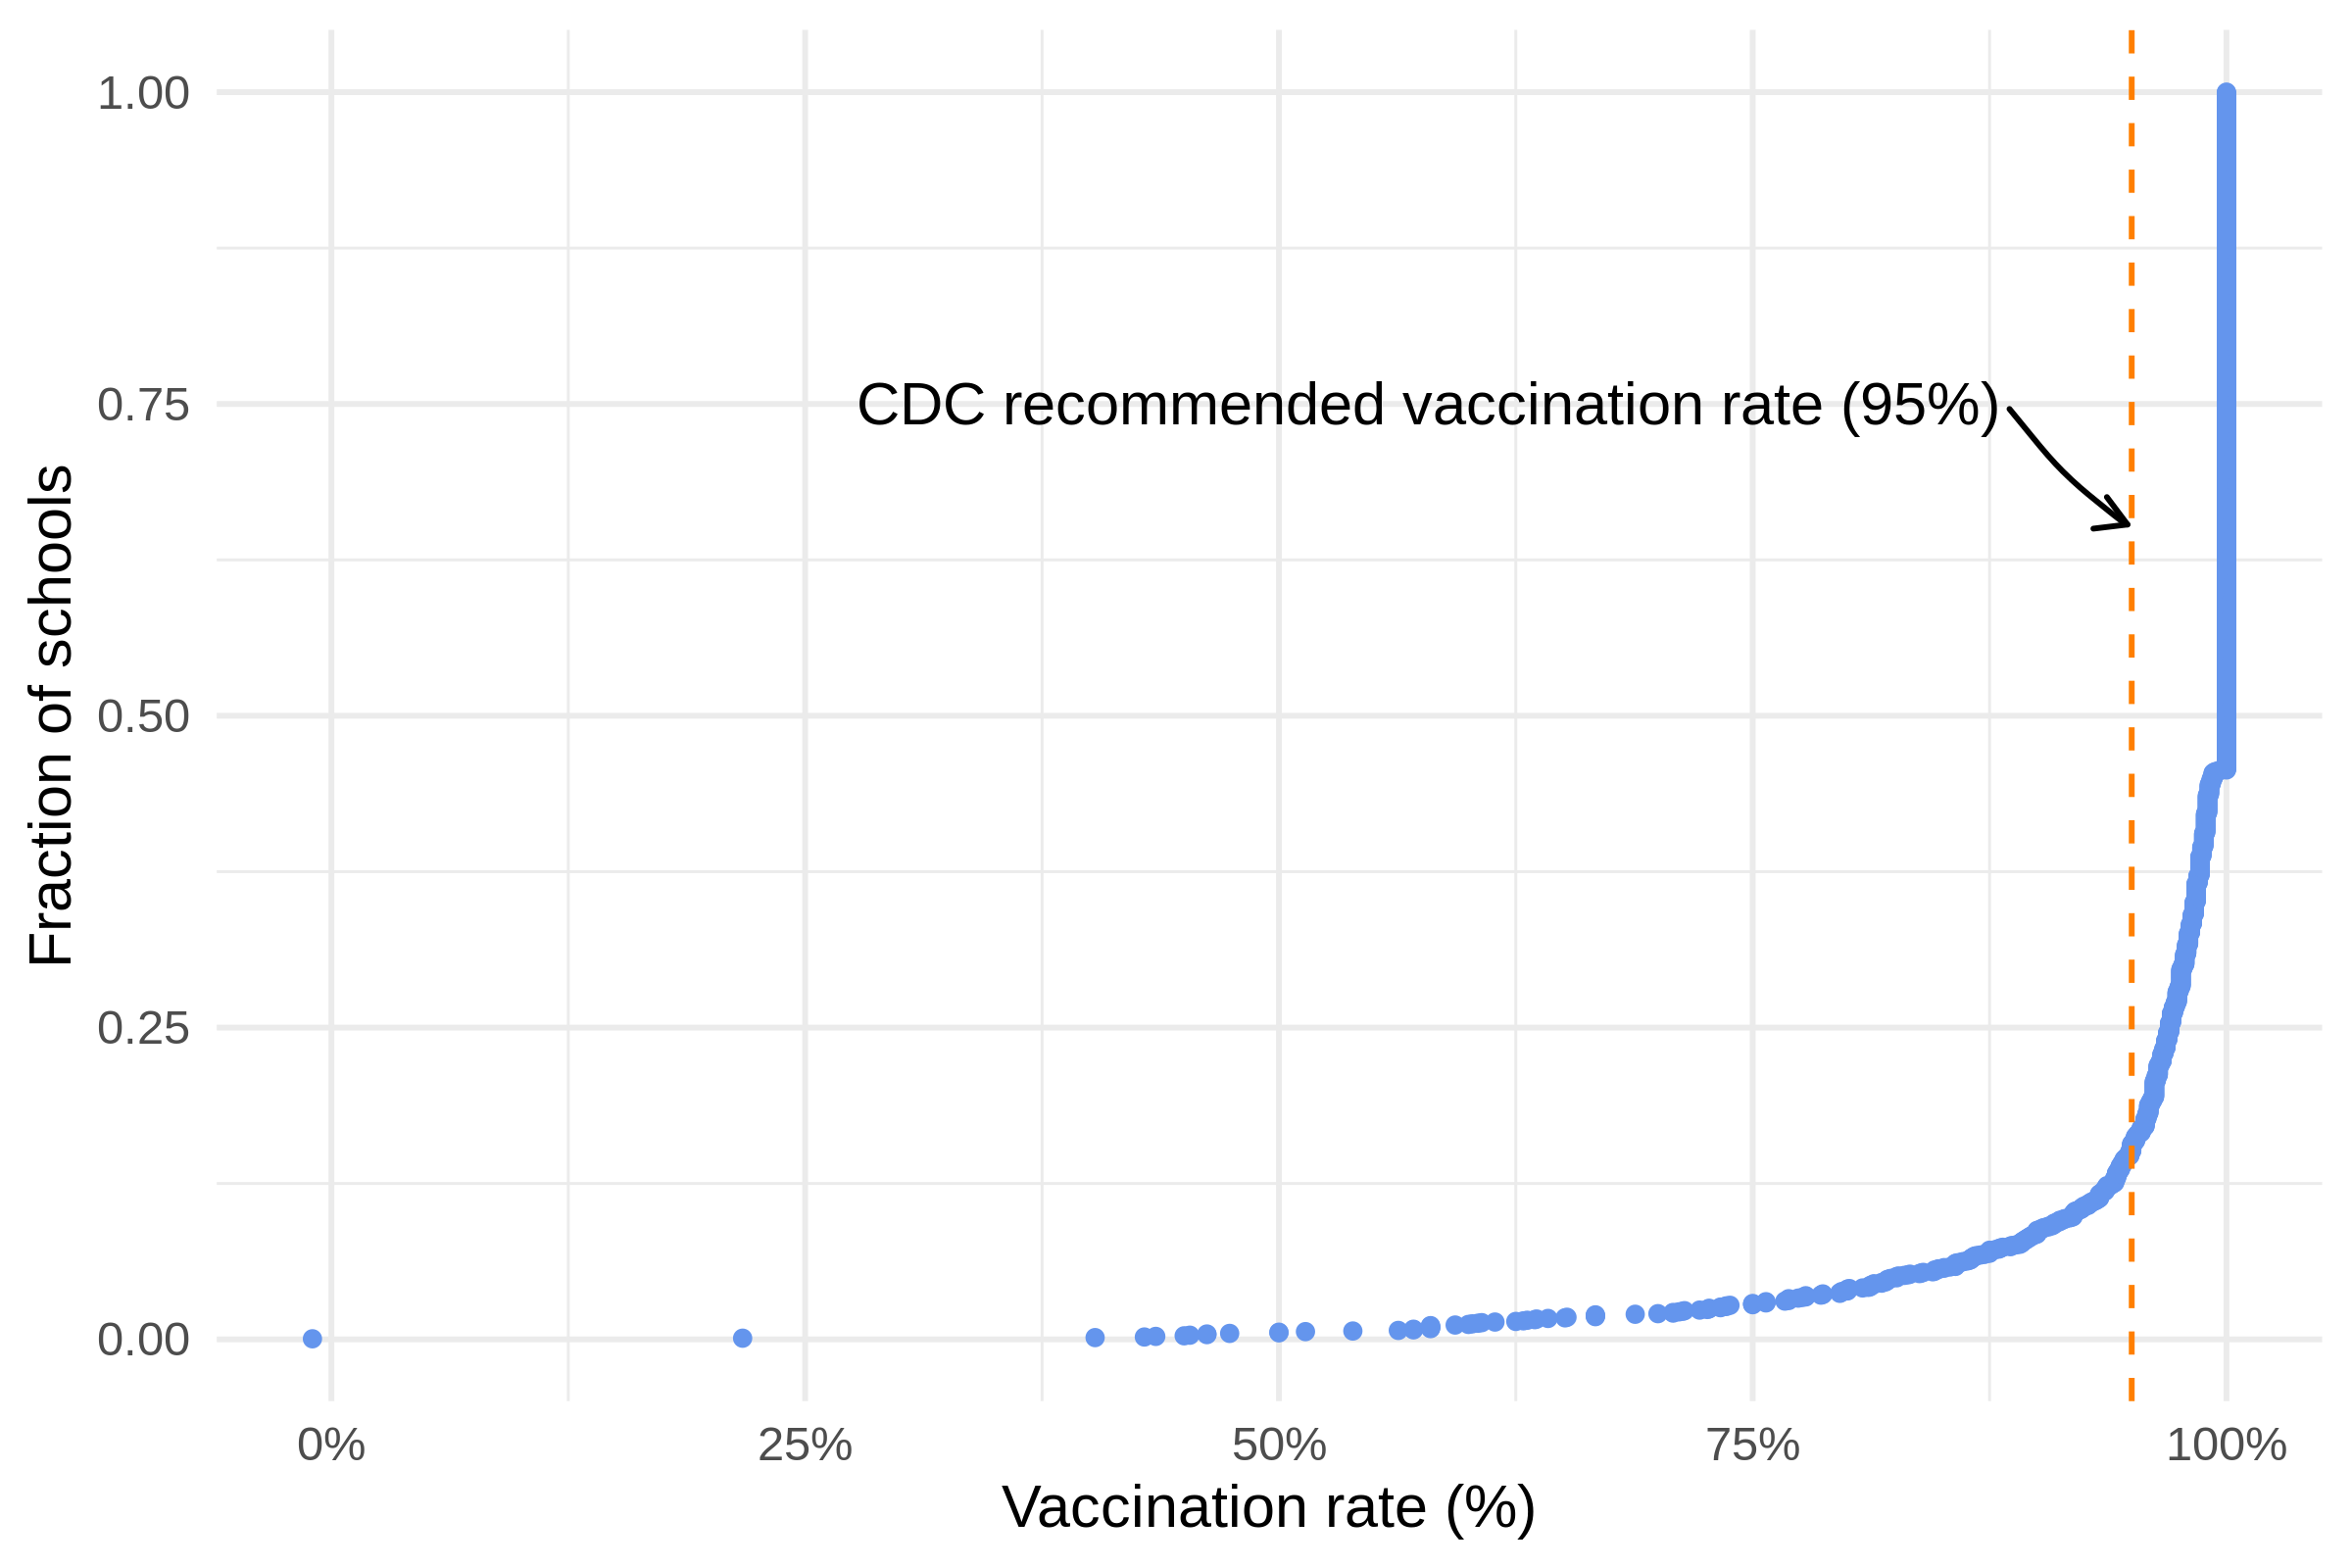

In [12]:
options(repr.plot.height = 4, repr.plot.width = 6, repr.plot.res = 400)

p = ggplot(ecdf, aes(x = overall, y = fraction_of_schools))
        
p = p + geom_point(size = 1, color = 'cornflowerblue')

p = p + theme_minimal()

p = p + labs(x = 'Vaccination rate (%)', y = "Fraction of schools")
            
p = p + geom_vline(xintercept = 95, color = "darkorange1", linetype = "dashed")
  
p = p + geom_text_repel(data = df_label, 
                        nudge_x = -8, nudge_y = 0.10, 
                        segment.curvature = 0.1, 
                        label = "CDC recommended vaccination rate (95%)", 
                        hjust = "right", color = 'black', arrow = arrow(length = unit(0.025, "npc") ))                      

p = p + scale_x_continuous(labels = scales::percent_format(scale = 1))                      

p = p + theme(legend.position = 0)

p